In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from matplotlib import pylab
from sklearn.model_selection import train_test_split
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)

In [2]:
virus_data = pd.read_csv("virus_data.csv")
virus_df = pd.DataFrame(data=virus_data)
virus_df.shape

(1250, 26)

In [3]:
virus_df['num_of_siblings'].value_counts()

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64

In [4]:
rand_seed = 23 # + parter last 2 digins of id
train, test = train_test_split(virus_df, test_size=0.2, random_state=rand_seed)

In [5]:
train.corr().spread.PCR_01

0.10095819141067508

In [6]:
train.corr().spread.PCR_02

0.5123103409911332

In [7]:
train.corr().spread.PCR_09

-0.02078913882635519

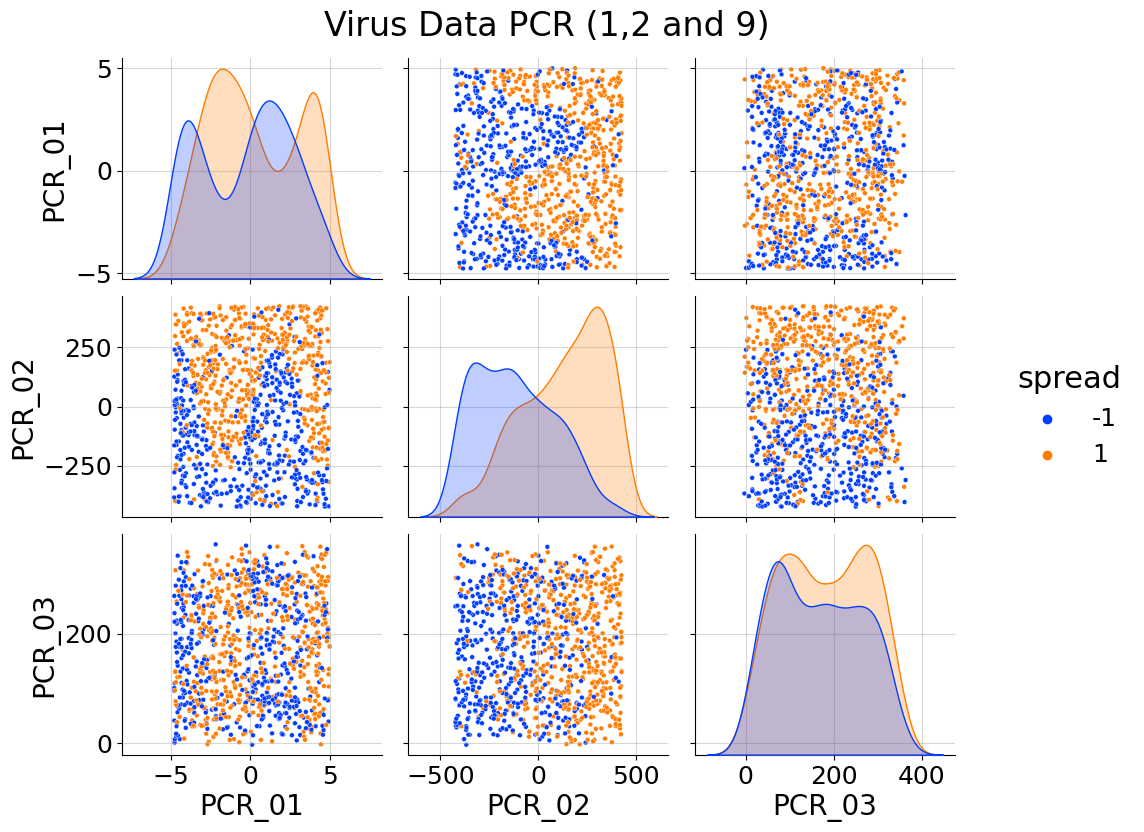

In [8]:
g=sns.pairplot(data=train, hue="spread", palette="bright", vars=["PCR_01", "PCR_02", "PCR_03"], plot_kws={"s": 12})
g.fig.suptitle("Virus Data PCR (1,2 and 9)", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [9]:
from sklearn.base import BaseEstimator,ClassifierMixin
import scipy

In [28]:
class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors
    def fit(self, X, y):
        # TODO: complete
        self.X = np.copy(X)
        self.y = np.copy(y)
        return self
    def predict(self, X):
        # Note: You can use self.n_neighbors here
        predictions = None
        # TODO: compute the predicted labels (+1 or -1)
        dist_mat = scipy.spatial.distance.cdist(XA=X, XB=self.X)
        sort_dist_idx = np.argpartition(a=dist_mat, kth=self.n_neighbors, axis=1)
        pred_sum = np.sum(self.y[sort_dist_idx][:, 0:self.n_neighbors], axis=1)
        predictions = np.where(pred_sum>0, 1, -1)
        return predictions

In [29]:
temp_df=pd.DataFrame(data=train, columns=["PCR_01", "PCR_02", "spread"])
model = kNN(n_neighbors=1)
model.fit(X=temp_df[["PCR_01", "PCR_02"]], y=temp_df["spread"])

kNN()

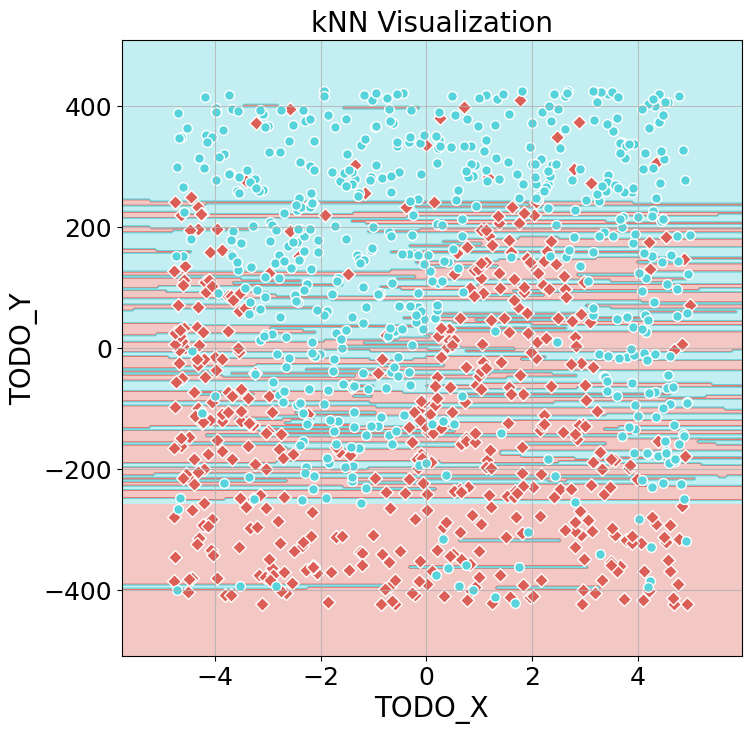

In [30]:
from visualize_clf import visualize_clf
visualize_clf(clf=model, X=temp_df[["PCR_01", "PCR_02"]].to_numpy(), Y=temp_df["spread"], title="kNN Visualization", xlabel="TODO_X", ylabel="TODO_Y")

In [31]:
model.score(temp_df[["PCR_01", "PCR_02"]],temp_df["spread"])

0.858